# Predicting handwritten digits from Mnist Dataset

### Importing dataset from Tensorflow

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
dataset = tfds.load('mnist')
train, test = dataset['train'], dataset['test']

train_numpy = np.vstack(tfds.as_numpy(train))
test_numpy = np.vstack(tfds.as_numpy(test))

X_train = np.array(list(map(lambda x: x[0]['image'], train_numpy)))
y_train = np.array(list(map(lambda x: x[0]['label'], train_numpy)))

X_test = np.array(list(map(lambda x: x[0]['image'], test_numpy)))
y_test = np.array(list(map(lambda x: x[0]['label'], test_numpy)))

/Users/prithvikewalramani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.
/Users/prithvikewalramani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


### Performing Preprocessing

In [3]:
train_datagen = ImageDataGenerator(
	rescale=1/255
)
validation_datagen = ImageDataGenerator(
	rescale=1/255
)


In [4]:
train_generator = train_datagen.flow(
        X_train,
        y_train, 
        batch_size=100)

validation_generator = validation_datagen.flow(
        X_train,
        y_train, 
        batch_size=50)



In [5]:
from tensorflow.keras.layers import *

### Creating Model

In [6]:
model=tf.keras.Sequential([
    Conv2D(16, (3,3), input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])


In [8]:
history=model.fit_generator(
	train_generator,
	steps_per_epoch=70,
	epochs=10,
	validation_data=validation_generator,
	validation_steps=40
	)


Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/10
70/70 [==============================] - 3s 37ms/step - loss: 1.0336 - accuracy: 0.7050 - val_loss: 0.4421 - val_accuracy: 0.8655
Epoch 2/10
70/70 [==============================] - 2s 33ms/step - loss: 0.3350 - accuracy: 0.9030 - val_loss: 0.2949 - val_accuracy: 0.9125
Epoch 3/10
70/70 [==============================] - 2s 34ms/step - loss: 0.2477 - accuracy: 0.9264 - val_loss: 0.2110 - val_accuracy: 0.9360
Epoch 4/10
70/70 [==============================] - 2s 36ms/step - loss: 0.1898 - accuracy: 0.9433 - val_loss: 0.1610 - val_accuracy: 0.9480
Epoch 5/10
70/70 [==============================] - 3s 37ms/step - loss: 0.1524 - accuracy: 0.9551 - val_loss: 0.1451 - val_accuracy: 0.9590
Epoch 6/10
70/70 [==============================] - 3s 38ms/step - loss: 0.1297 - accuracy: 0.9601 - val_loss: 0.1317 - val_accuracy: 0.9655
Epoch 7/10
70/70 [==============================] - 2s 34ms/step - loss: 0.1163 - accuracy: 0.9656 - val_loss: 0.0930 - val_accuracy: 0.9740
Epoch 8/10
70

### Model has been trained. Some examples below

In [34]:
import matplotlib.pyplot as plt

In [43]:
p=[np.random.randint(10000) for q in range(11)]

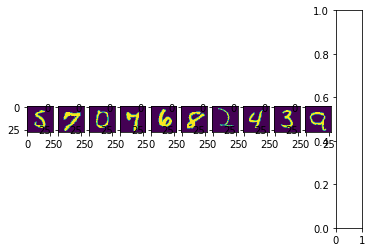

In [53]:
# Displaying 10 random handwritten images in the test dataset

j=0
for i in p: 
    j+=1
    plt.imshow(X_test[i].reshape([28,28]));
    plt.subplot(1, 11, j)
plt.show()

In [50]:
# Actual values of the data in the test dataset

values=[]
for i in p[1:]:
    values.append(y_test[i])
print(values)

[5, 7, 0, 7, 6, 8, 2, 4, 3, 9]


In [51]:
# Predictions performed by the trained model

predictions=[]
for i in p[1:]:
    predictions.append(list(model.predict(X_test)[i]).index(1))
print(predictions)

[8, 7, 0, 7, 6, 8, 2, 4, 3, 9]
